# Loan approval Prediction



### Importing the date from Kaggele

In [3]:
import pandas as pd
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [4]:
print(df_train.shape)

(58645, 13)


Meil on 58645 rida infot mille peal treenida


In [6]:
df_train.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [7]:
print(df_test.shape)


(39098, 12)


Meil on 39098 rida infot mille peal testida läbi kaggle'i


In [9]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


## Kontrollime infot

### Kas leidub null väärtuseid?

In [12]:
df_test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Null Väärtuseid ei leidu kummaski

### Käime üle kõik veerud, ja vaatame kas andmed on korreksed

#### **Vanus**

In [17]:
df_test["person_age"].describe()

count    39098.000000
mean        27.566781
std          6.032761
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

In [18]:
df_train["person_age"].describe()

count    58645.000000
mean        27.550857
std          6.033216
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        123.000000
Name: person_age, dtype: float64

**Train andmetes on isik kes on 123 aastat vana, eemaldame ta:**


In [20]:
df_train = df_train[df_train["person_age"] != 123]

In [21]:
df_train["person_age"].describe()

count    58644.000000
mean        27.549229
std          6.020378
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         84.000000
Name: person_age, dtype: float64

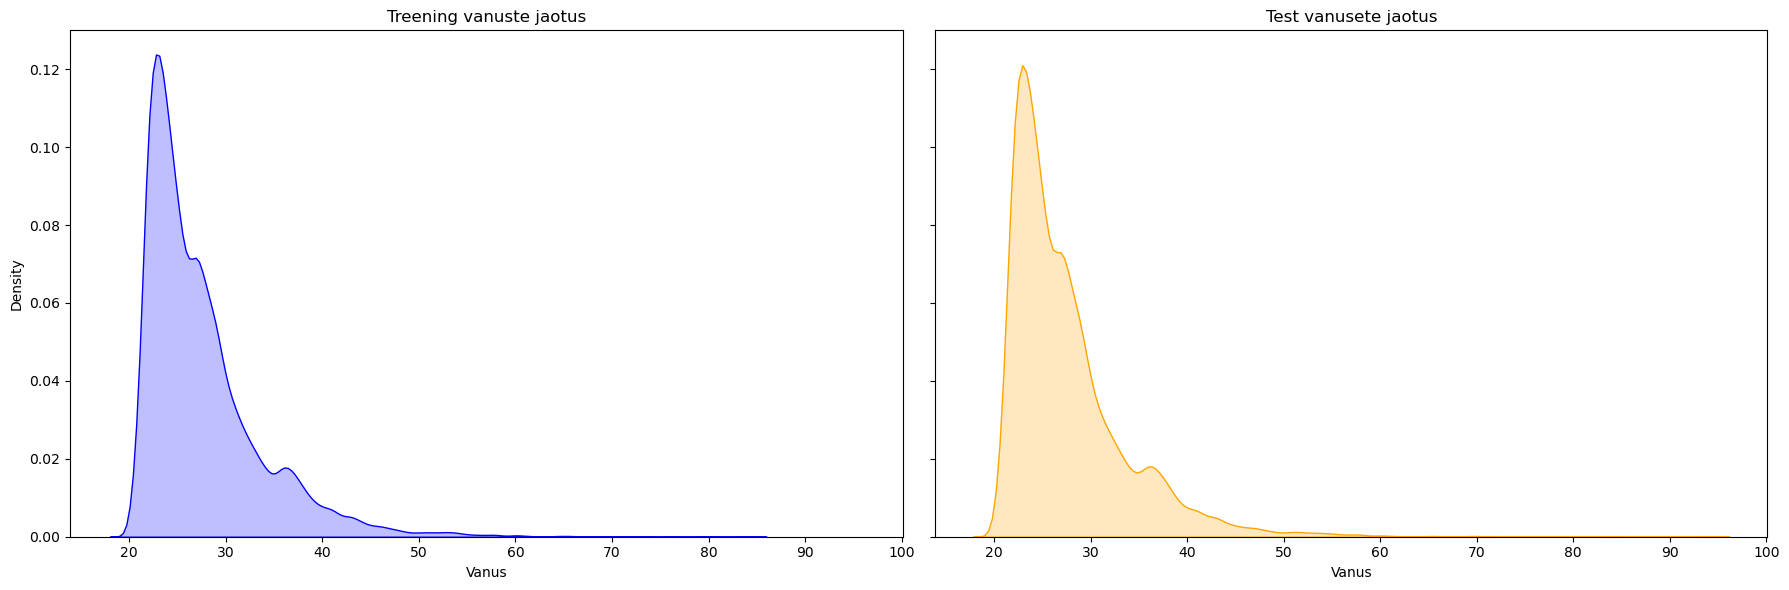

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

#Et 2 oleks kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True, sharey=True)

#Train
sns.kdeplot(x=df_train["person_age"], color="blue", fill=True, ax=axes[0])
axes[0].set_title("Treening vanuste jaotus")
axes[0].set_xlabel("Vanus")

#Test
sns.kdeplot(x=df_test["person_age"], color="orange", fill=True, ax=axes[1])
axes[1].set_title("Test vanusete jaotus")
axes[1].set_xlabel("Vanus")

plt.tight_layout()
plt.show()

#### **Sissetulek**

In [86]:
#et tuleks loetavad numbrid
pd.options.display.float_format = '{:,.2f}'.format
print(df_test["person_income"].describe())

count      39,098.00
mean       64,060.46
std        37,955.83
min         4,000.00
25%        42,000.00
50%        58,000.00
75%        75,885.00
max     1,900,000.00
Name: person_income, dtype: float64


In [88]:
#et tuleks loetavad numbrid
pd.options.display.float_format = '{:,.2f}'.format
print(df_test["person_income"].describe())

count      39,098.00
mean       64,060.46
std        37,955.83
min         4,000.00
25%        42,000.00
50%        58,000.00
75%        75,885.00
max     1,900,000.00
Name: person_income, dtype: float64


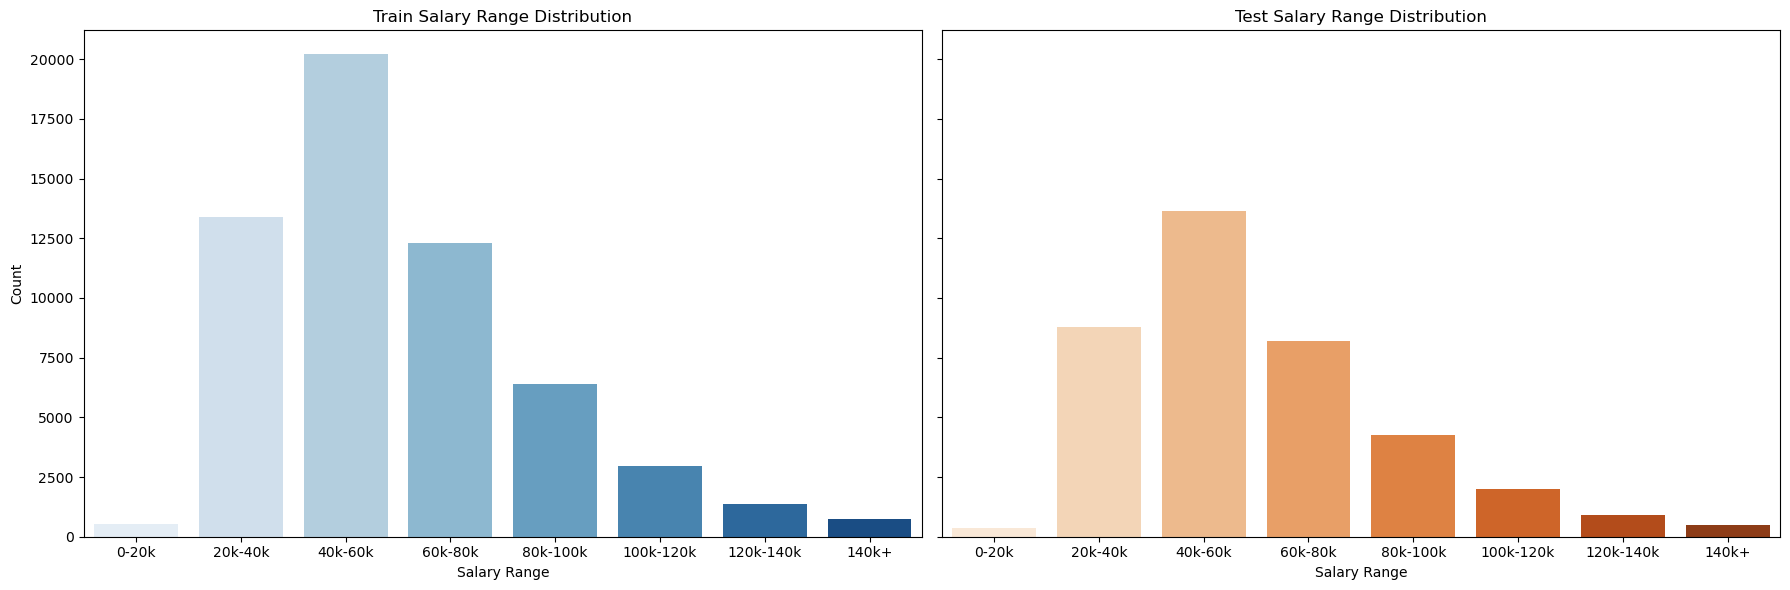

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

#palga vahemikud
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']


df_train['salary_range'] = pd.cut(df_train['person_income'], bins=bins, labels=labels, include_lowest=True)
df_test['salary_range'] = pd.cut(df_test['person_income'], bins=bins, labels=labels, include_lowest=True)

# Et 2 kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Train 
sns.countplot(x='salary_range', data=df_train, ax=axes[0], palette='Blues', hue='salary_range',  legend=False)
axes[0].set_title("Train Salary Range Distribution")
axes[0].set_xlabel("Salary Range")
axes[0].set_ylabel("Count")

# Test 
sns.countplot(x='salary_range', data=df_test, ax=axes[1], palette='Oranges', hue='salary_range', legend=False)
axes[1].set_title("Test Salary Range Distribution")
axes[1].set_xlabel("Salary Range")

plt.tight_layout()
plt.show()

#### **Elukoha omamis liik**

In [120]:
df_train["person_home_ownership"].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24823
OWN          3138
OTHER          89
Name: count, dtype: int64

In [122]:
df_test["person_home_ownership"].value_counts()

person_home_ownership
RENT        20280
MORTGAGE    16683
OWN          2056
OTHER          79
Name: count, dtype: int64

#### **Tööstaaž aastates**

In [195]:
df_test["person_emp_length"].describe()

count   39,098.00
mean         4.69
std          3.87
min          0.00
25%          2.00
50%          4.00
75%          7.00
max         42.00
Name: person_emp_length, dtype: float64

In [197]:
df_train["person_emp_length"].describe()

count   58,642.00
mean         4.70
std          3.90
min          0.00
25%          2.00
50%          4.00
75%          7.00
max         41.00
Name: person_emp_length, dtype: float64

**Kaks inimest olid käinud tööl 123 aastat, eemaldame nad:**

In [157]:
df_train = df_train[df_train["person_emp_length"] != 123]

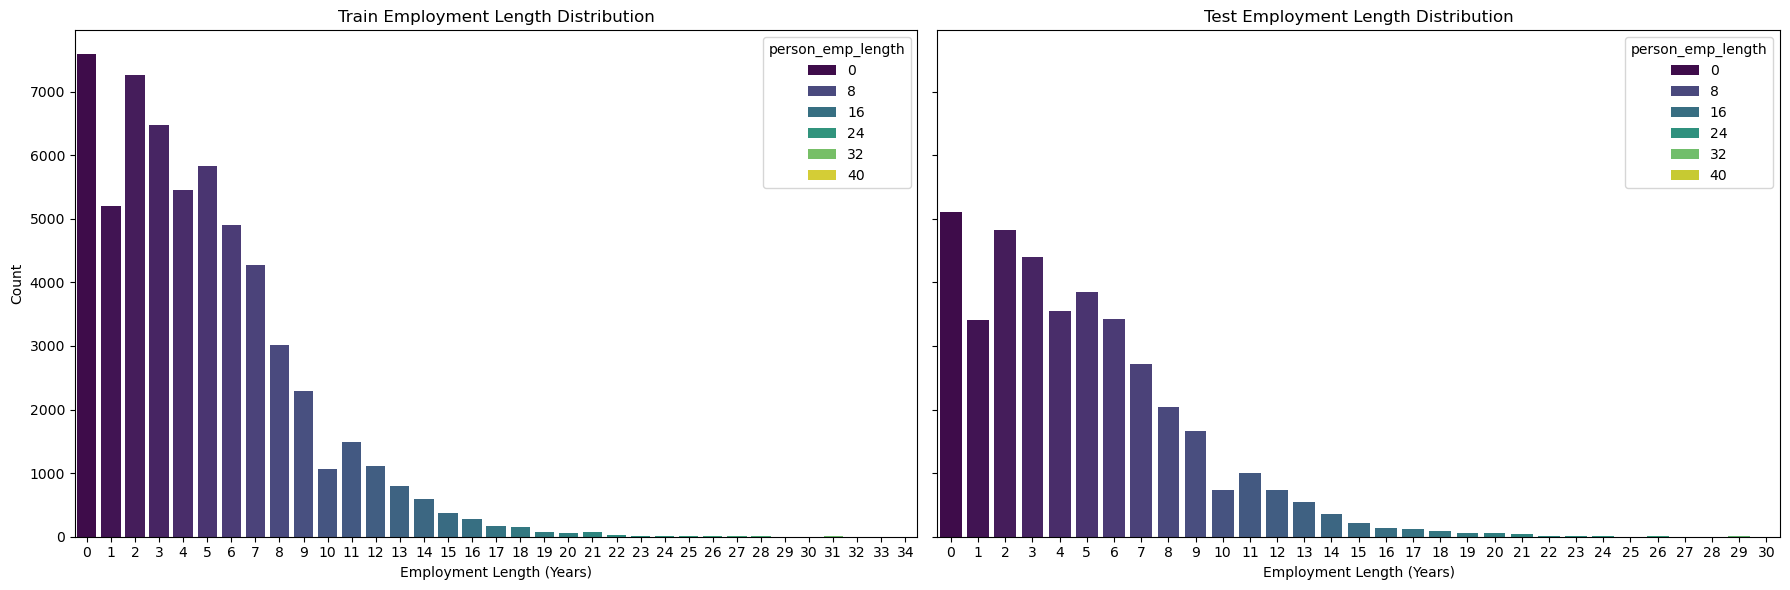

In [193]:
df_train['emp_length_count'] = df_train['person_emp_length'].map(df_train['person_emp_length'].value_counts())
df_test['emp_length_count'] = df_test['person_emp_length'].map(df_test['person_emp_length'].value_counts())

# et 2 oleks kõrvuti
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Train 
sns.barplot(x='person_emp_length', y='emp_length_count', data=df_train, ax=axes[0],hue='person_emp_length',  palette='viridis')
axes[0].set_title("Train Employment Length Distribution")
axes[0].set_xlabel("Employment Length (Years)")
axes[0].set_ylabel("Count")

# Test 
sns.barplot(x='person_emp_length', y='emp_length_count', data=df_test, ax=axes[1],hue='person_emp_length', palette='viridis')
axes[1].set_title("Test Employment Length Distribution")
axes[1].set_xlabel("Employment Length (Years)")

# Asendab x-teljel komadega arvud komateta arvudega
for ax in axes:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels([f"{int(x)}" for x in ax.get_xticks()])


plt.tight_layout()
plt.show()

#### **Mille jaoks laenu kasutatakse?**

In [30]:
df_test["loan_intent"].value_counts()

loan_intent
EDUCATION            8076
MEDICAL              7447
PERSONAL             6815
VENTURE              6632
DEBTCONSOLIDATION    5915
HOMEIMPROVEMENT      4213
Name: count, dtype: int64

In [31]:
df_train["loan_intent"].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10015
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

#### **Laenu kvaliteet**

In [32]:
df_test["loan_grade"].value_counts()

loan_grade
A    14005
B    13604
C     7460
D     3269
E      637
F      105
G       18
Name: count, dtype: int64

In [208]:
df_train["loan_grade"].value_counts()

loan_grade
A    20984
B    20398
C    11036
D     5033
E     1009
F      149
G       33
Name: count, dtype: int64